# Project

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
import pandas as pd
import plotly.io as pio
%matplotlib inline

In [2]:
from utils import *
from handle_dataset import *
from density import * 
from zscore import *
from plots import * 
from kmeans import *

In [3]:
pio.renderers.default = "notebook_connected"

In [4]:
DATA_PATH = 'data'

In [5]:
activities_labels = {
    1 : 'STAND',
    2 : 'SIT',
    3 : 'SIT&TALK',
    4 : 'WALK',
    5 : 'WALK&TALK',
    6 : 'CLIMB_STAIRS',
    7 : 'CLIMB_STAIRS&TALK',
    8 : 'STAND_TO_SIT',
    9 : 'SIT_TO_STAND',
    10: 'STAND_TO_SIT&TALK',
    11: 'SIT&TALK_TO_STAND',
    12: 'STAND_TO_WALK', 
    13: 'WALK_TO_STAND', 
    14: 'STAND_TO_CLIMB_STAIRS',
    15: 'CLIMB_STAIRS_TO_WALK',
    16: 'CLIMB_STAIRS&TALK_TO_WALK&TALK', 

}

## Exercise 2 - Import dataset

In [6]:
# data_user_0 = get_user_data(path=DATA_PATH, user_id=0)

In [7]:
# data_user_0.shape

In [8]:
dataset = get_all_data(DATA_PATH)

In [9]:
# dataset.shape

In [10]:
# type(dataset)

## Explore data

In [11]:
# dataset.describe()

In [12]:
# dataset.info()

In [13]:
# dataset.columns

In [14]:
data_with_features = append_metrics(dataset)

In [15]:
data_with_features

,device_id,accelerometer_x,accelerometer_y,accelerometer_z,gyroscope_x,gyroscope_y,gyroscope_z,magnetometer_x,magnetometer_y,magnetometer_z,timestamp,activity,accelerometer_module,gyroscope_module,magnetometer_module
0,1,-1.8650,9.3890,2.58120,-1.141800,-1.18560,0.84998,-0.34476,0.59839,1.01340,505.89,1,9.914340,1.852517,1.226340
1,1,-1.7963,9.3742,2.44600,-1.561800,-0.66165,0.59730,-0.34274,0.57631,1.00000,525.42,1,9.853184,1.798268,1.203995
2,1,-1.8696,9.3000,2.35140,-1.187700,-1.28410,0.14212,-0.34476,0.59639,1.01560,544.95,1,9.773151,1.754919,1.227185
3,1,-1.7961,9.3624,2.45840,-0.583990,-2.03340,0.42912,-0.32863,0.62249,1.01560,564.48,1,9.845011,2.158681,1.235692
4,1,-1.6768,9.3506,2.46850,-0.370500,-1.36470,0.37194,-0.33669,0.62048,1.02450,584.01,1,9.815237,1.462196,1.244169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3242723,5,-1.0568,9.7161,0.37560,-0.158430,-0.88740,0.44327,0.12121,0.62675,0.36739,1061000.00,1,9.780619,1.004523,0.736534
3242724,5,-1.0565,9.6921,0.38826,0.112400,-0.59353,0.39687,0.11111,0.59880,0.36304,1061000.00,1,9.757240,0.722784,0.709017
3242725,5,-1.0566,9.6920,0.37607,-0.054114,-0.67227,0.36407,0.11717,0.58084,0.35217,1061100.00,1,9.756674,0.766435,0.689295
3242726,5,-1.0563,9.6801,0.38850,0.096447,-0.51923,0.16742,0.11717,0.61677,0.36304,1061100.00,1,9.745309,0.554014,0.725212


### Select only right wrist data

In [16]:
def get_device_data(data, device_id):
    return data_with_features[data_with_features['device_id'] == device_id]

In [17]:
right_wrist_id = 2
data = get_device_data(data_with_features, right_wrist_id)
right_wrist_data = data[['accelerometer_module', 'gyroscope_module', 'magnetometer_module', 'activity']]
right_features = right_wrist_data[['accelerometer_module','gyroscope_module', 'magnetometer_module']]

## Exercise 3.1 - Boxplot of the vector modules grouped by activity

In [18]:
# boxplot_features(data_with_features, 0) # ! use the data of all users

### Plotting boxplot of the modules by activity separated by devices

![Boxplot core](./data/images/boxplot.png "Boxplot - detect outliers")

### Plot of the right wrist (id = 2)

In [19]:
# boxplot_features(right_wrist_data, title='Right wrist')

In [20]:
# right_wrist_data.describe()

## Exercise 3.2 - Outliers density

In [21]:
# calculate_density_by_activity(right_wrist_data, activities_labels)
# todo plot with the results

## Exercise 3.3 - Z-score test

In [22]:
# plot_zscore_outliers(data, 3, 'accelerometer_module')

## Exercise 3.6 - K-means

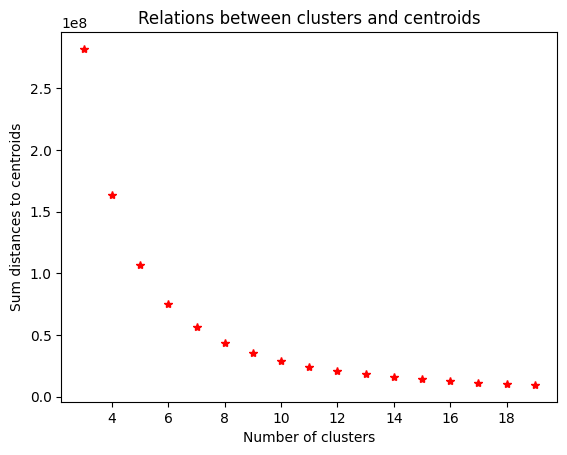

6

In [23]:
optimal_k = best_number_clusters(right_features)
optimal_k

Como se pode observer, segundo o método Elbow, k=9 parece ser o número de clusters ideal

In [24]:
# optimal_k = 9

#### Plot by devices

In [25]:
# kmeans = KMeans(optimal_k)

In [26]:
# labels = kmeans.predict(right_features)

In [27]:
# plot_kmeans_clusters(kmeans.data, labels)

In [28]:
# labels.to_csv('labels.csv', index=False)

In [29]:
# plot_kmeans_clusters(kmeans.data, right_wrist_data['activity'] )

In [30]:
# accelerometer_data = data[['accelerometer_x', 'accelerometer_y', 'accelerometer_z']]
# gyroscope_data = data[['gyroscope_x', 'gyroscope_y', 'gyroscope_z']]
# magnetometer_data = data[['magnetometer_x', 'magnetometer_y', 'magnetometer_z']]

In [31]:
# kmeans = KMeans(5)

### Accelerometer

In [32]:
#accelerometer_norm = normalize_data(accelerometer_data)
# labels = kmeans.predict(accelerometer_data)

In [33]:
# plot_kmeans_clusters(kmeans.data, labels, 'accelerometer')

### Gyroscope

In [34]:
# labels = kmeans.predict(gyroscope_data)

In [35]:
# plot_kmeans_clusters(kmeans.data, labels)

### Magnetometer

In [36]:
# labels = kmeans.predict(magnetometer_data,)

In [37]:
# plot_kmeans_clusters(kmeans.data, labels)

## Exercise 3.8 - Add outliers

In [31]:
def calculate_zscore_density(outliers):
    return outliers.sum() / len(outliers)

In [59]:
import random
def inject_outliers(data, outliers, num, k, z):
    data = data.copy()
    mean = data.mean()
    std = data.std()
    indexes = pd.Series(outliers[outliers == False].index)
    selected_indexes = indexes.sample(num)
    print(f'Len non outliers: {len(indexes)}')
    print(len(selected_indexes.unique()))
    data[selected_indexes] = data[selected_indexes].apply(lambda x : mean + k * random.choice([-1, 1]) * (std + np.random.uniform(0, z)))
    return data

In [60]:
def add_outliers(data, percentage, k=3.5):
    outliers_indexes = calculate_outliers_indexes(data, k)
    density = calculate_zscore_density(outliers_indexes)
    new_data = data
    iter = 1
    while percentage > density:
        print(f'Iter: {iter} -- density: {density}')
        num = int((percentage - density) * len(data))
        print(num)
        new_data = inject_outliers(data, outliers_indexes, num, k, iter*5)
        outliers_indexes = calculate_outliers_indexes(new_data, k)
        density = calculate_zscore_density(outliers_indexes)
        iter += 1
    return new_data, density

In [62]:
data, density = add_outliers(data['accelerometer_module'], 0.03)

Iter: 1 -- density: 0.01285203025752665
13406
Len non outliers: 771774
13406
Iter: 2 -- density: 0.015229809342791582
11547
Len non outliers: 769915
11547
Iter: 3 -- density: 0.012220172878225478
13900
Len non outliers: 772268
13900
Iter: 4 -- density: 0.013709002816497872
12736
Len non outliers: 771104
12736
Iter: 5 -- density: 0.012680635745732404
13540
Len non outliers: 771908
13540
Iter: 6 -- density: 0.01326005152067862
13087
Len non outliers: 771455
13087
Iter: 7 -- density: 0.012781681763879758
13461
Len non outliers: 771829
13461
Iter: 8 -- density: 0.013018308515237484
13276
Len non outliers: 771644
13276
Iter: 9 -- density: 0.012813658351901073
13436
Len non outliers: 771804
13436
Iter: 10 -- density: 0.012924936878215247
13349
Len non outliers: 771717
13349
Iter: 11 -- density: 0.012816216478942778
13434
Len non outliers: 771802
13434
Iter: 12 -- density: 0.012786798017963168
13457
Len non outliers: 771825
13457
Iter: 13 -- density: 0.012890402163152227
13376
Len non outlier

KeyboardInterrupt: 